In [238]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
from typing import Set, Any
def openCSVandConcat():
    synop = "synop."
    csv = ".csv"
    meteo_df_list = []
    for a in range(1996,1997):
        for m in range(1,4):
            m = f'{m:02d}'
            nomfichierlist = (synop,a,m,csv)
            nomfichier = ''.join(map(str,nomfichierlist))
            meteo = pd.read_csv(nomfichier, sep = '\;')
            meteo_df_list.append(meteo)
    df_final = pd.concat(meteo_df_list)

def remove_others(df, columns: Set[Any]):
    cols_total: Set[Any] = set(df.columns)
    diff: Set[Any] = cols_total - columns
    df.drop(diff, axis=1, inplace=True)

def traitement_csv(df):
    df.rename(columns = {'t':'temperature', 'tn12':'Température min 12 heure','tn24':'Température min 24 heure',
                        'tx12':'Température max 12 heure','tx24':'Température max 24 heure'},inplace = True)
    remove_others(df,{'numer_sta','date','temperature','dd','Température min 12 heure','Température min 24 heure',
                    'Température max 12 heure','Température max 24 heure'})
    df['annee'] = df['date'].astype(str).str[:4]
    df['mois'] = df['date'].astype(str).str.slice(4,6) + df['date'].astype(str).str.slice(2,4)
    df['jour'] = df['date'].astype(str).str.slice(6,8) + df['date'].astype(str).str.slice(4,6) + df['date'].astype(str).str.slice(2,4)
    return df

def convertIntOrFloat(df):
    df['temperature'] = df['temperature'].astype(str).str[:6]
    df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
    df['Température min 12 heure'] = df['Température min 12 heure'].astype(str).str[:6]
    df['Température min 12 heure'] = pd.to_numeric(df['Température min 12 heure'], errors='coerce')
    df['Température min 24 heure'] = df['Température min 24 heure'].astype(str).str[:6]
    df['Température min 24 heure'] = pd.to_numeric(df['Température min 24 heure'], errors='coerce')
    df['Température max 12 heure'] = df['Température max 12 heure'].astype(str).str[:6]
    df['Température max 12 heure'] = pd.to_numeric(df['Température max 12 heure'], errors='coerce')
    df['Température max 24 heure'] = df['Température max 24 heure'].astype(str).str[:6]
    df['Température max 24 heure'] = pd.to_numeric(df['Température max 24 heure'], errors='coerce')
    df['dd'] = df['dd'].astype(str).str[:6]
    df['dd'] = pd.to_numeric(df['dd'], errors='coerce')
    df['annee'] = df['annee'].astype(str).str[:6]
    df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
    df['annee'].astype(int)
    df['mois'] = df['mois'].astype(str).str[:6]
    df['mois'] = pd.to_numeric(df['mois'], errors='coerce')
    df['mois'].astype(int)
    df['jour'] = df['jour'].astype(str).str[:6]
    df['jour'] = pd.to_numeric(df['jour'], errors='coerce')
    df['jour'].astype(int)

    
def temperatureMoisGraph(df) :
    dfTannee = df.groupby('annee').agg({'temperature' : 'mean'})
    dfTannee.sort_values(by = 'temperature')
    dfTannee.reset_index(inplace=True)
    plt.figure(figsize=(5,5))
    plt.barh(dfTannee["annee"], dfTannee["temperature"], color='red')
    plt.title("Les 10 années les plus chaudes en températures")
    plt.xlabel("Temperature (en Kalvin)")
    plt.ylabel("Année")
    
    dfTmois = df.groupby('mois').agg({'temperature' : 'mean'})
    dfTmois.reset_index(inplace = True)
    figure = plt.figure(figsize = (10,5))
    ax = sns.lineplot(x = "mois", y = "temperature", data = dfTmois)
    ax.set_ylim(260, 300)
    plt.title("Evolution de la temperature au fil des années (de 1996 à 2022)")
    plt.show()

In [250]:
dataframe = openCSVandConcat
print(dataframe)

<function openCSVandConcat at 0x000001D954157700>


In [236]:
synop = "synop."
csv = ".csv"
meteo_df_list = []
for a in range(1996,1997):
    for m in range(1,4):
        m = f'{m:02d}'
        nomfichierlist = (synop,a,m,csv)
        nomfichier = ''.join(map(str,nomfichierlist))
        meteo = pd.read_csv(nomfichier, sep = '\;')
        meteo_df_list.append(meteo)
print(len(meteo_df_list))
#meteo_df_list
df_final = pd.concat(meteo_df_list)
df_final

C:\Users\Mac book Pro de Simo\AppData\Local\Temp\ipykernel_12568\3873273516.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  meteo = pd.read_csv(nomfichier, sep = '\;')
C:\Users\Mac book Pro de Simo\AppData\Local\Temp\ipykernel_12568\3873273516.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  meteo = pd.read_csv(nomfichier, sep = '\;')
C:\Users\Mac book Pro de Simo\AppData\Local\Temp\ipykernel_12568\3873273516.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you

3


,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,19960101000000,100030,100,1,170,2.000000,276.040000,275.950000,99,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
1,7015,19960101000000,100020,100,1,0,0.000000,275.950000,275.350000,96,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
2,7020,19960101000000,99740,-50,8,180,8.200000,281.650000,281.540000,99,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
3,7027,19960101000000,99940,0,0,120,4.100000,279.040000,279.040000,100,...,6,6,1500,mq,mq,mq,mq,mq,mq,NaN
4,7037,19960101000000,100010,90,0,190,1.000000,278.540000,278.250000,98,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13147,78894,19960331210000,101370,-80,6,70,4.100000,299.750000,292.850000,66,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
13148,78897,19960331210000,101360,-60,5,120,5.100000,300.350000,292.650000,63,...,3,8,690,mq,mq,mq,mq,mq,mq,NaN
13149,78925,19960331210000,101290,-60,5,80,4.100000,301.040000,294.850000,69,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
13150,81405,19960331210000,101030,mq,mq,80,5.100000,301.950000,296.850000,74,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


In [158]:
meteo = pd.read_csv("synop.199601.csv", sep = '\;')
meteo2 = pd.read_csv("synop.199602.csv", sep = '\;')
meteo3 = pd.read_csv("synop.199603.csv", sep = '\;')

C:\Users\Mac book Pro de Simo\AppData\Local\Temp\ipykernel_12568\1707687075.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  meteo = pd.read_csv("synop.199601.csv", sep = '\;')
C:\Users\Mac book Pro de Simo\AppData\Local\Temp\ipykernel_12568\1707687075.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  meteo2 = pd.read_csv("synop.199602.csv", sep = '\;')
C:\Users\Mac book Pro de Simo\AppData\Local\Temp\ipykernel_12568\1707687075.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpret

In [161]:
meteo = pd.concat([meteo,meteo2,meteo3])
meteo

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,19960101000000,100030,100,1,170,2.000000,276.040000,275.950000,99,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
1,7015,19960101000000,100020,100,1,0,0.000000,275.950000,275.350000,96,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
2,7020,19960101000000,99740,-50,8,180,8.200000,281.650000,281.540000,99,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
3,7027,19960101000000,99940,0,0,120,4.100000,279.040000,279.040000,100,...,6,6,1500,mq,mq,mq,mq,mq,mq,NaN
4,7037,19960101000000,100010,90,0,190,1.000000,278.540000,278.250000,98,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13147,78894,19960331210000,101370,-80,6,70,4.100000,299.750000,292.850000,66,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
13148,78897,19960331210000,101360,-60,5,120,5.100000,300.350000,292.650000,63,...,3,8,690,mq,mq,mq,mq,mq,mq,NaN
13149,78925,19960331210000,101290,-60,5,80,4.100000,301.040000,294.850000,69,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
13150,81405,19960331210000,101030,mq,mq,80,5.100000,301.950000,296.850000,74,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


In [162]:
traitement_csv(meteo)
meteo

,numer_sta,date,dd,temperature,Température min 12 heure,Température min 24 heure,Température max 12 heure,Température max 24 heure,annee,mois,jour
0,7005,19960101000000,170,276.040000,mq,mq,mq,mq,1996,0196,010196
1,7015,19960101000000,0,275.950000,mq,mq,mq,mq,1996,0196,010196
2,7020,19960101000000,180,281.650000,mq,mq,mq,mq,1996,0196,010196
3,7027,19960101000000,120,279.040000,mq,mq,mq,mq,1996,0196,010196
4,7037,19960101000000,190,278.540000,mq,mq,mq,mq,1996,0196,010196
...,...,...,...,...,...,...,...,...,...,...,...
13147,78894,19960331210000,70,299.750000,mq,mq,mq,mq,1996,0396,310396
13148,78897,19960331210000,120,300.350000,mq,mq,mq,mq,1996,0396,310396
13149,78925,19960331210000,80,301.040000,mq,mq,mq,mq,1996,0396,310396
13150,81405,19960331210000,80,301.950000,mq,mq,mq,mq,1996,0396,310396


In [163]:
meteo.dtypes

numer_sta                    int64
date                         int64
dd                          object
temperature                 object
Température min 12 heure    object
Température min 24 heure    object
Température max 12 heure    object
Température max 24 heure    object
annee                       object
mois                        object
jour                        object
dtype: object

In [164]:
convertIntOrFloat(meteo)
meteo.dtypes

numer_sta                     int64
date                          int64
dd                          float64
temperature                 float64
Température min 12 heure    float64
Température min 24 heure    float64
Température max 12 heure    float64
Température max 24 heure    float64
annee                         int64
mois                          int64
jour                          int64
dtype: object

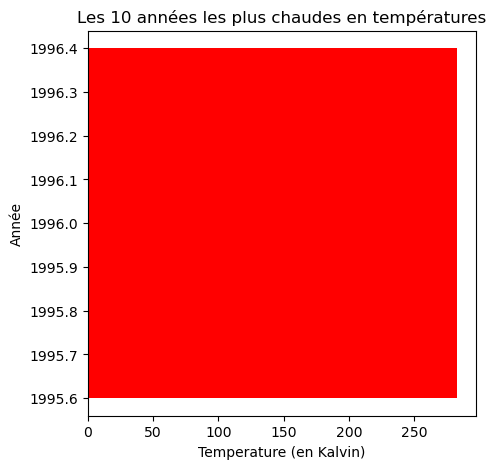

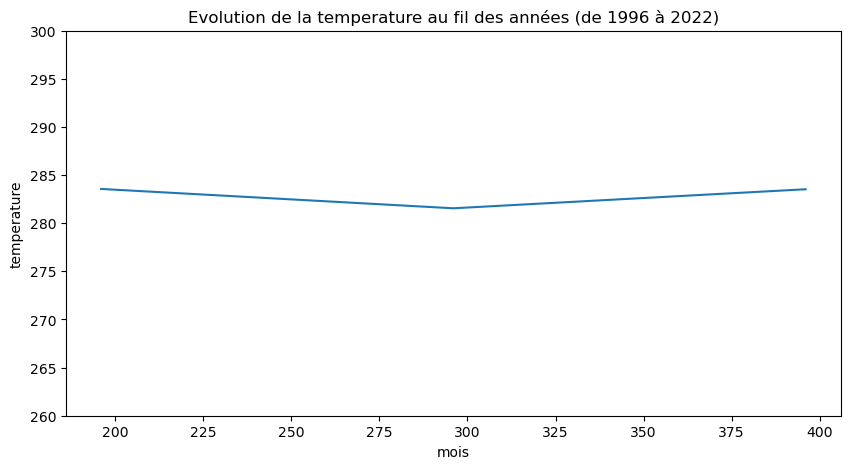

In [165]:
df_graph = temperatureMoisGraph(meteo)
df_graph